# Imports

In [23]:
# Imports.
from networkx import grid_graph, draw, draw_networkx_nodes, draw_networkx_edges, info, density, degree_centrality
from networkx.readwrite import json_graph
from matplotlib.pyplot import figure, show
from random import randint
from json import dump

# Constant variables.
COLOR_BG = "#a8dadc"
COLOR_FG = "#457b9d"
SIZE_BG_NODES = 800
SIZE_FG_NODES = 2400
EDGE_BG_WEIGHT = 4
EDGE_FG_WEIGHT = 24
MATRIX_SIDE = 10
NO_FG_NODES = 20
FIG_SIZE = (12, 12)

# Activity 2

# 2.1 Sub-activity: Graph creation

## Task 1

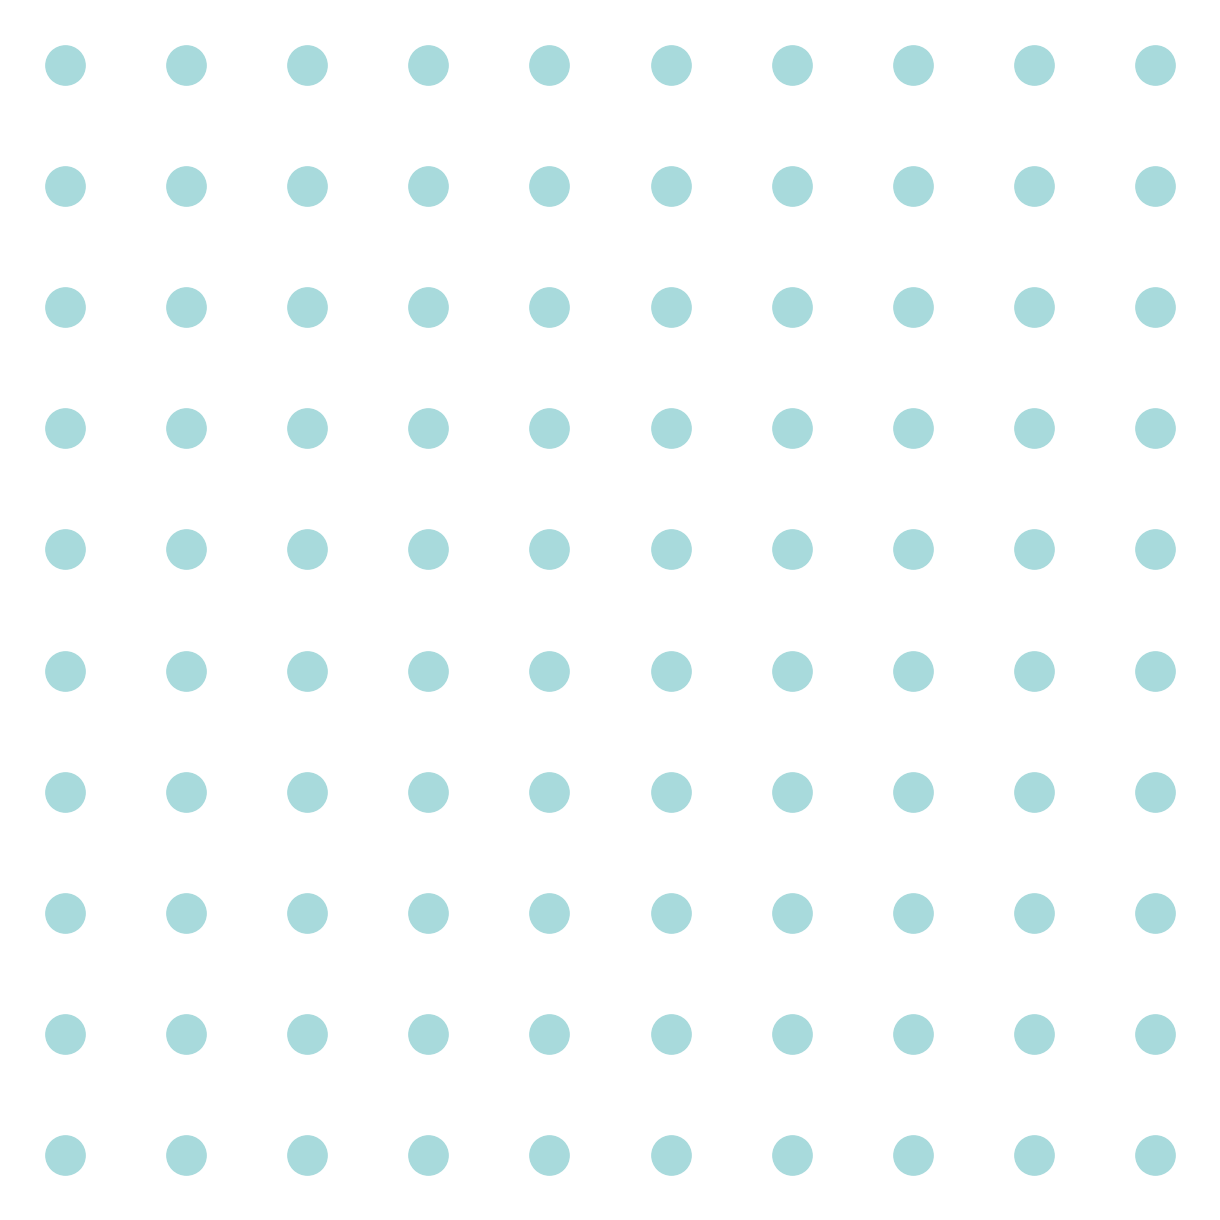

In [24]:
# The Google Python Style Guide has been followed throughout each task.
# 
# Creates a background matrix of nodes.
#

# Declares a graph with dimensions "MATRIX_SIDE".
graph = grid_graph([MATRIX_SIDE, MATRIX_SIDE])
# Determines the (x, y) coordinates of each node and stores this in the
# "position" dictionary. Uses two nested loops, as specified.
position = {}
for x in range(MATRIX_SIDE):
    for y in range(MATRIX_SIDE):
        position[(x, y)] = (x, y)

# When the networkx "grid_graph" method is called, it automatically adds edges
# between each of the nodes. We now remove these edges.
graph.remove_edges_from(graph.edges())
# Declares a figure of size "FIG_SIZE".
figure(figsize=FIG_SIZE)
# Adds nodes to the graph of colour "COLOR_BG" and size "SIZE_BG_NODES"
draw(graph, pos=position, node_color=COLOR_BG, node_size=SIZE_BG_NODES)

show()


## Task 2

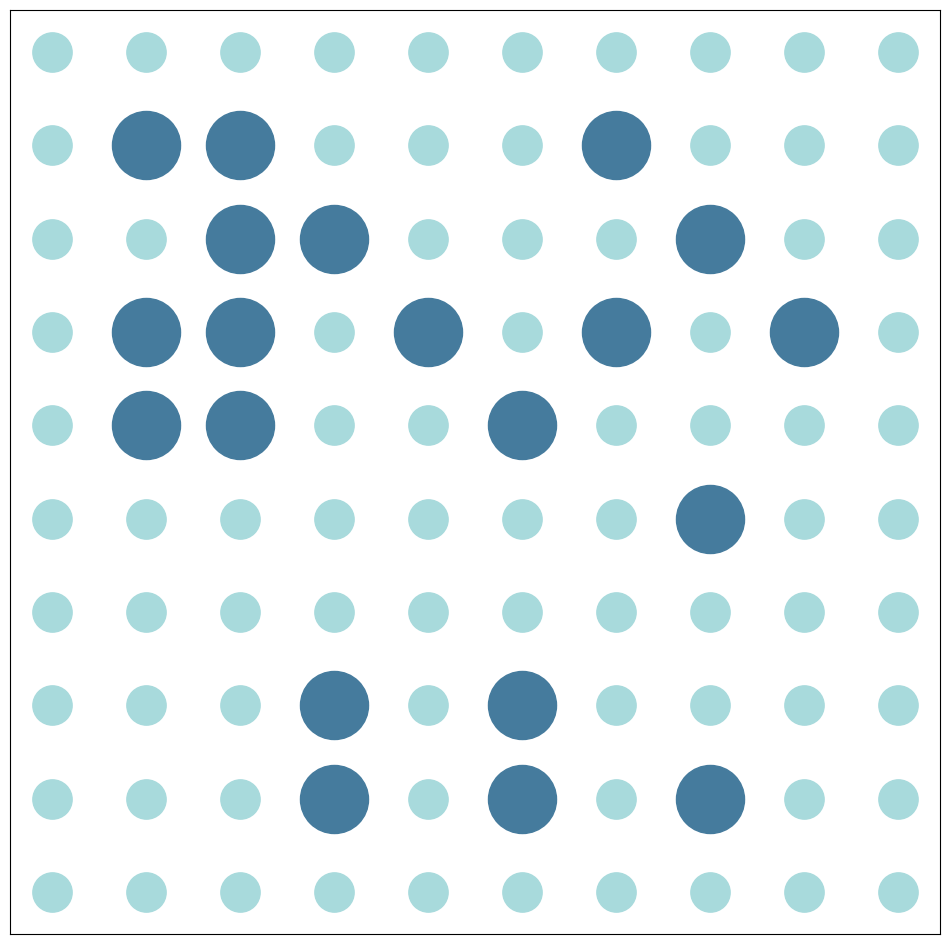

In [25]:
# Converts some background nodes into foreground nodes in the graph randomly,
# as specified. BG = background, FG = foreground.
#

fg_nodes = []  # A list of all FG nodes.
bg_nodes = list(graph.nodes())  # A list of all BG nodes (initially all nodes).
to_change = NO_FG_NODES  # Number of nodes that still need to be converted.
while to_change > 0:  # While we have not converted enough BG to FG nodes.
    # Picks a random BG node to convert to a FG node.
    node_to_change = bg_nodes[randint(0, len(bg_nodes) - 1)]
    # If the node is not located on the border.
    if (node_to_change[0] != 0 and node_to_change[0] != 9 and
        node_to_change[1] != 0 and node_to_change[1] != 9):
        # Removes the node from the list of BG nodes and adds the node to the
        # list of FG nodes.
        fg_nodes.append(node_to_change)
        bg_nodes.remove(node_to_change)
        to_change -= 1

# Declares a figure of size "FIG_SIZE".
figure(figsize=FIG_SIZE)
# Adds the FG and BG nodes onto the graph in their appropriate colours and sizes.
draw_networkx_nodes(graph, pos=position, nodelist=bg_nodes,
                       node_color=COLOR_BG,
                       node_size=SIZE_BG_NODES)
draw_networkx_nodes(graph, pos=position, nodelist=fg_nodes,
                       node_color=COLOR_FG,
                       node_size=SIZE_FG_NODES)

show()

## Task 3

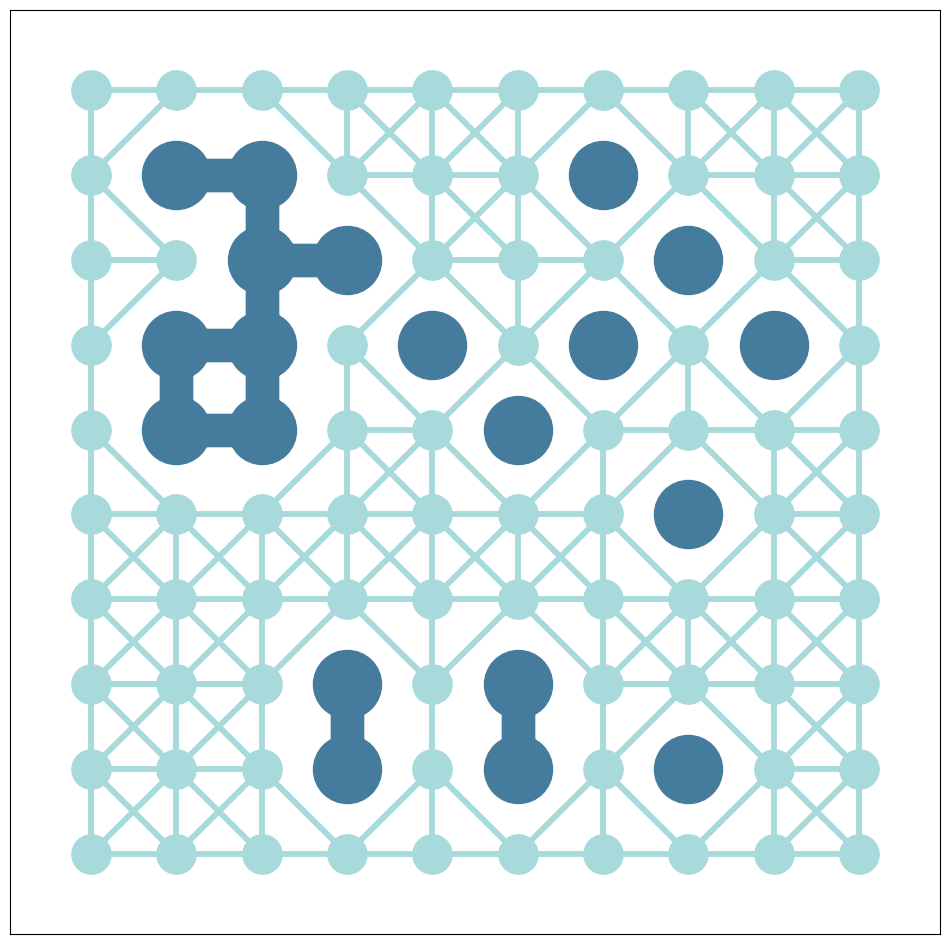

In [26]:
# Adds the edges to the graph, as specified. BG = background, FG = foreground.
#

# Declares a figure of size "FIG_SIZE".
figure(figsize=FIG_SIZE)
# Adds the FG and BG nodes onto the graph in their appropriate colours and sizes.
# (This is done at the end of task 2 but repeated here to avoid any errors.)
draw_networkx_nodes(graph, pos=position, nodelist=bg_nodes,
                       node_color=COLOR_BG,
                       node_size=SIZE_BG_NODES)
draw_networkx_nodes(graph, pos=position, nodelist=fg_nodes,
                       node_color=COLOR_FG,
                       node_size=SIZE_FG_NODES)

fg_edgelist = []  # List of edges between FG nodes.
for node1 in fg_nodes:  # For each FG node.
    # For each node adjacent to "node1" (not counting diagonals).
    for node2 in [(node1[0], node1[1]+1), (node1[0], node1[1]-1),
                  (node1[0]+1, node1[1]), (node1[0]-1, node1[1])]:
        # If "node2" is also a FG node, add an edge between "node1" and "node2".
        if node2 in fg_nodes:
            fg_edgelist.append((node1, node2))

bg_edgelist = []  # List of edges between BG nodes.
for node1 in bg_nodes:  # For each BG node.
    # For each node adjacent to "node1" (counting diagonals this time).
    for node2 in [# All nodes in left-most column adjacent to "node1".
                  (node1[0]-1, node1[1]+1), (node1[0]-1, node1[1]),
                  (node1[0]-1, node1[1]-1),
                  
                  # Nodes directly above and below "node1".
                  (node1[0], node1[1]+1), (node1[0], node1[1]-1),
                  
                  # All nodes in right-most column adjacent to "node1".
                  (node1[0]+1, node1[1]+1), (node1[0]+1, node1[1]),
                  (node1[0]+1, node1[1]-1)]:
        
        # If "node2" is a BG node, add an edge between "node1" and "node2".
        if node2 in bg_nodes:
            bg_edgelist.append((node1, node2))

# Add all of the edges onto the graph.
graph.add_edges_from(fg_edgelist + bg_edgelist)
draw_networkx_edges(graph, pos=position, edgelist=fg_edgelist,
                       width=EDGE_FG_WEIGHT,
                       edge_color=COLOR_FG)
draw_networkx_edges(graph, pos=position, edgelist=bg_edgelist,
                       width=EDGE_BG_WEIGHT,
                       edge_color=COLOR_BG)

show()

# 2.2 Sub-activity: Graph manipulation and output

## Task 4

In [27]:
# Graph information.
print("Graph information:")
print(info(graph))

# Density of the graph.
print("\nDensity of the graph:")
print(density(graph))

# Degree centrality of the graph's nodes.
print("\nDegree centrality of the graph's nodes:")
print(degree_centrality(graph))

Graph information:
Graph with 100 nodes and 214 edges

Density of the graph:
0.04323232323232323

Degree centrality of the graph's nodes:
{(0, 0): 0.030303030303030304, (0, 1): 0.05050505050505051, (0, 2): 0.05050505050505051, (0, 3): 0.05050505050505051, (0, 4): 0.04040404040404041, (0, 5): 0.030303030303030304, (0, 6): 0.030303030303030304, (0, 7): 0.030303030303030304, (0, 8): 0.04040404040404041, (0, 9): 0.020202020202020204, (1, 0): 0.05050505050505051, (1, 1): 0.08080808080808081, (1, 2): 0.08080808080808081, (1, 3): 0.08080808080808081, (1, 4): 0.06060606060606061, (1, 5): 0.020202020202020204, (1, 6): 0.020202020202020204, (1, 7): 0.030303030303030304, (1, 8): 0.010101010101010102, (1, 9): 0.030303030303030304, (2, 0): 0.04040404040404041, (2, 1): 0.06060606060606061, (2, 2): 0.06060606060606061, (2, 3): 0.07070707070707072, (2, 4): 0.06060606060606061, (2, 5): 0.020202020202020204, (2, 6): 0.030303030303030304, (2, 7): 0.030303030303030304, (2, 8): 0.020202020202020204, (2, 9)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_45700\2561256438.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(info(graph))


## Task 5

In [28]:
# Initially creates a JSON representation of the graph.
graph_json = json_graph.node_link_data(graph)

# This JSON representation does not represent the nodes and edges colours,
# node_types, and has the id in the wrong format (not as in Listing 3 from the  
# task sheet). I modify these manually to ensure it looks exactly like
# Listing 3.
for node in graph_json["nodes"]:  # For each node in the graph.
    if node["id"] in fg_nodes:  # If the current node is a FG node.
        # Assigns the appropriate colour and type.
        node["color"] = COLOR_FG
        node["node_type"] = "fg"
    elif node["id"] in bg_nodes:  # Elif the current node is a BG node.
        # Assigns the appropriate colour and type.
        node["color"] = COLOR_BG
        node["node_type"] = "bg"
    
    # Deletes then re-adds "id" so that it is ordered correctly as in the JSON
    # file as in listing 3.
    id = node["id"]
    node.pop("id")
    node["id"] = str(id[0]) + "-" + str(id[1])
    
for edge in graph_json["links"]:  # For each edge in the graph.
    if edge["source"] in fg_nodes:  # If the edge is a FG edge.
        # Assigns the appropriate colour and weight.
        edge["color"] = COLOR_FG
        edge["weight"] = EDGE_FG_WEIGHT
    if edge["source"] in bg_nodes:  # If the edge is a BG edge.
        # Assigns the appropriate colour and weight.
        edge["color"] = COLOR_BG
        edge["weight"] = EDGE_BG_WEIGHT
    # Deletes then readds the edges "source" and "target" so that it is ordered
    # correctly as in the JSON file as in listing 3.
    keys = {"source": edge["source"], "target": edge["target"]}
    edge.pop("source")
    edge.pop("target")
    for key in ["source", "target"]:
        edge[key] = str(keys[key][0]) + "-" + str(keys[key][1])

# Creates a file with the graph's data in the specified JSON format.
with open("json_data.json", "w") as file:
    dump(graph_json, file, indent=4)